In [31]:
# Load our Dataset 
import pandas as pd 
data = pd.read_csv('hassen_dataset_global.csv')

features = ['Token' ,'NER','POS','DEP','Lemma']
data = data[features]
# Display the first few rows
print(data.head())

       Token NER    POS     DEP      Lemma
0       file   O   VERB   advcl       file
1         em   O   PRON  dative         em
2  fertility   O   NOUN    dobj  fertility
3        and   O  CCONJ      cc        and
4  sterility   O   NOUN    conj  sterility


In [32]:
# check Ner frequency 
data['NER'].value_counts()

NER
O             14581
I-ORG           263
I-PERSON        180
B-DISEASE       151
B-ORG           130
B-PERSON        110
I-DISEASE       109
B-CHEMICAL       67
B-GPE            50
I-CHEMICAL       49
I-DATE           39
B-DATE           32
I-GPE            14
B-LOC             1
I-LOC             1
Name: count, dtype: int64

In [33]:
#EDA online report 

import os
import webbrowser
from ydata_profiling import ProfileReport


# Generate the report
Report = ProfileReport(data,html={'filename': 'output.html'})

# Save the report to a file
Report.to_file("output.html")

# Open the file in a web browser
url = 'output.html'
# webbrowser.open('file://' + os.path.abspath(url))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
# Understand the Data Structure
# Check the data's dimensions, column names, and data types.

# Get data information
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display unique values in each column
for column in data.columns:
    print(f"{column} unique values: {data[column].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15777 entries, 0 to 15776
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Token   15777 non-null  object
 1   NER     15777 non-null  object
 2   POS     15777 non-null  object
 3   DEP     15777 non-null  object
 4   Lemma   15777 non-null  object
dtypes: object(5)
memory usage: 616.4+ KB
None
Token    0
NER      0
POS      0
DEP      0
Lemma    0
dtype: int64
Token unique values: 3007
NER unique values: 15
POS unique values: 15
DEP unique values: 43
Lemma unique values: 2611


In [35]:
# Analyze Token Distribution
# Evaluate token length, frequency, and diversity.


# Token length distribution
data['Token_Length'] = data['Token'].apply(len)
print(data['Token_Length'].describe())

# Token frequency
token_counts = data['Token'].value_counts()
print(token_counts.head(10))

count    15777.000000
mean         5.338848
std          3.051707
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: Token_Length, dtype: float64
Token
the     834
of      529
and     416
to      343
in      312
a       287
with    195
for     192
on      149
is      127
Name: count, dtype: int64


NER
O             14581
I-ORG           263
I-PERSON        180
B-DISEASE       151
B-ORG           130
B-PERSON        110
I-DISEASE       109
B-CHEMICAL       67
B-GPE            50
I-CHEMICAL       49
I-DATE           39
B-DATE           32
I-GPE            14
B-LOC             1
I-LOC             1
Name: count, dtype: int64


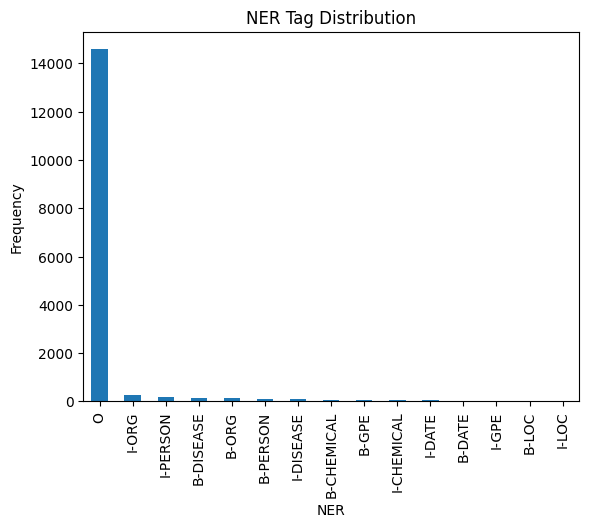

In [36]:

# Analyze NER Tags
# Explore the distribution of named entity types and assess the balance.
# NER tag distribution
%matplotlib inline
import matplotlib.pyplot as plt 


ner_distribution = data['NER'].value_counts()
print(ner_distribution)

# Plot NER tag distribution
import matplotlib.pyplot as plt

ner_distribution.plot(kind='bar', title='NER Tag Distribution', ylabel='Frequency')
plt.show()

POS
NOUN     4504
ADP      2025
PROPN    1749
ADJ      1678
VERB     1644
DET      1446
AUX       699
CCONJ     542
PRON      410
ADV       370
PART      295
SCONJ     235
X          93
NUM        75
INTJ       12
Name: count, dtype: int64
DEP
compound     2244
prep         1977
pobj         1836
amod         1605
det          1450
dobj          793
conj          790
nsubj         665
cc            532
advmod        440
aux           433
nmod          339
ccomp         279
advcl         257
auxpass       257
acl           227
nsubjpass     211
mark          180
relcl         176
xcomp         127
pcomp         118
acomp         116
attr           94
poss           88
appos          83
neg            79
npadvmod       68
nummod         66
ROOT           45
agent          44
dep            35
case           24
expl           21
oprd           16
punct          13
preconj        12
dative          8
predet          7
prt             7
intj            6
quantmod        4
csubj           4


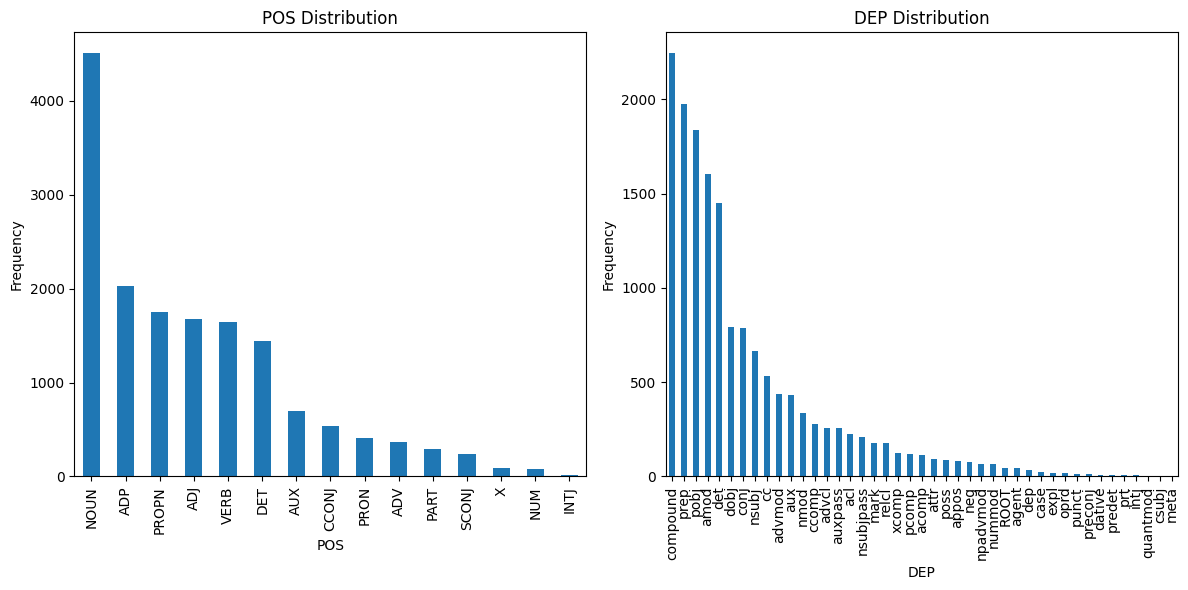

In [37]:
# 5. POS and DEP Analysis
# Analyze the distribution of POS and dependency labels.

# POS distribution
pos_distribution = data['POS'].value_counts()
print(pos_distribution)

# DEP distribution
dep_distribution = data['DEP'].value_counts()
print(dep_distribution)

# Plot POS and DEP distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
pos_distribution.plot(kind='bar', ax=axs[0], title='POS Distribution', ylabel='Frequency')
dep_distribution.plot(kind='bar', ax=axs[1], title='DEP Distribution', ylabel='Frequency')
plt.tight_layout()
plt.show()

In [38]:
# Filter for deasease and chemical  entities
disease_entities = data[data['NER'] == ('B-DISEASE' or 'I-DISEASE')]
chemical_entities = data[data['NER'] == ('B-CHEMICAL' or 'I-CHEMICAL')]
person_entities = data[data['NER'] == ('B-PERSON' or 'I-PERSON')]
org_entities = data[data['NER'] == ('B-ORG' or 'I-ORG') ]
GPE_entities = data[data['NER'] == ('B-GPE' or 'I-GPE')]
DATE_entities = data[data['NER'] == ('B-DATE' or 'I-DATE') ]

print(f"Number of DISEASE entities: {disease_entities.shape[0]}")
print(f"Number of CHEMICAL entities: {chemical_entities.shape[0]}")
print(f"Number of PERSON entities: {person_entities.shape[0]}")
print(f"Number of ORG entities: {org_entities.shape[0]}")
print(f"Number of GPE entities: {GPE_entities.shape[0]}")
print(f"Number of DATE entities: {DATE_entities.shape[0]}")

# Display sample entities
print("Sample DISEASE entities:")
print(disease_entities['Token'].head(10))

print("Sample CHEMICAL entities:")
print(chemical_entities['Token'].head(10))

print("Sample PERSON entities:")
print(person_entities['Token'].head(10))

print("Sample ORG entities:")
print(org_entities['Token'].head(10))

print("Sample GPE entities:")
print(GPE_entities['Token'].head(10))

print("Sample DATE entities:")
print(DATE_entities['Token'].head(10))

Number of DISEASE entities: 151
Number of CHEMICAL entities: 67
Number of PERSON entities: 110
Number of ORG entities: 130
Number of GPE entities: 50
Number of DATE entities: 32
Sample DISEASE entities:
588      thrombosis
614           uster
675         failure
720          penile
750           uster
756        mcindone
835           birth
859    virilization
882      congenital
945         primary
Name: Token, dtype: object
Sample CHEMICAL entities:
491       surmountable
827     spironolactone
829        finasteride
1033      testosterone
1041         estrogens
1060      testosterone
1086      testosterone
2532      methotrexate
2548      methotrexate
2551         potassium
Name: Token, dtype: object
Sample PERSON entities:
20      joseph
24        john
29     rebecca
31        john
91     elliott
100    rebecca
121         al
237         tg
331         tg
595         tg
Name: Token, dtype: object
Sample ORG entities:
611           mayer
2571           yuan
2747            the
2881 

In [39]:
# 8. Insights from Lemmas
# Understand common lemmas and their relationship with named entities.


# # Lemma frequency
# lemma_counts = data['Lemma'].value_counts()
# print(lemma_counts.head(10))

# Lemmas for PERSON and disease
disease_lemmas = disease_entities['Lemma'].value_counts()
chemical_lemmas = chemical_entities['Lemma'].value_counts()

print("Top lemmas for disease entities:")
print(disease_lemmas.head(10))

print("Top lemmas for chemical entities:")
print(chemical_lemmas.head(10))

Top lemmas for disease entities:
Lemma
pain               42
infertility        13
vasovagal           8
myoma               5
uterine             5
abortion            5
fibroid             4
retroperitoneal     4
ovarian             3
infection           3
Name: count, dtype: int64
Top lemmas for chemical entities:
Lemma
carbon          35
di               5
testosterone     3
orificio         3
methotrexate     2
shahine          2
surmountable     1
gonadotropin     1
eter             1
sutura           1
Name: count, dtype: int64


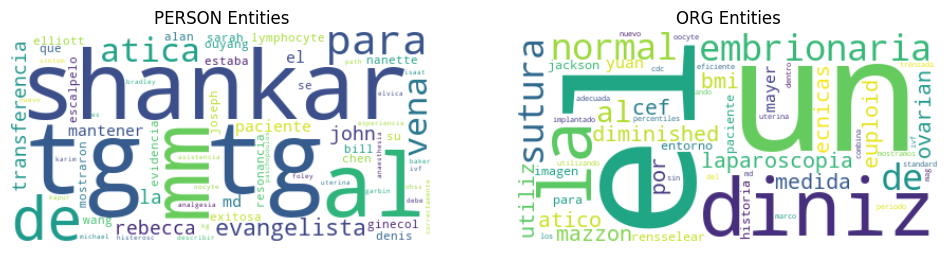

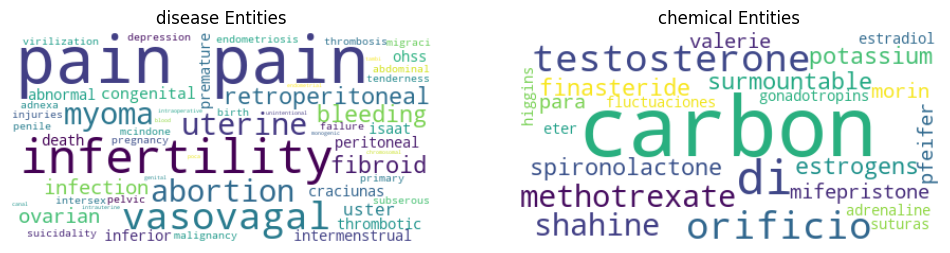

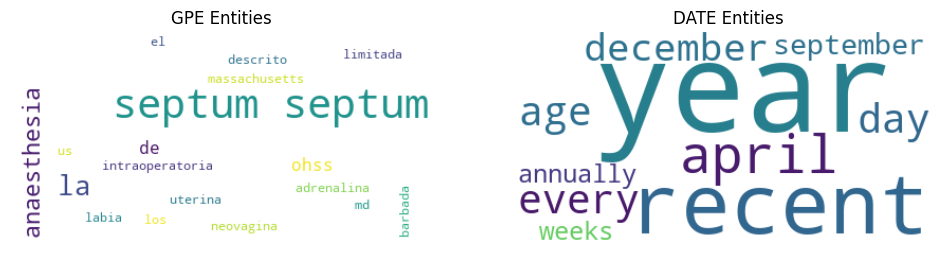

In [40]:
# Visualization of Named Entities
from wordcloud import WordCloud

# Generate word clouds
disease_wc = WordCloud(background_color='white').generate(' '.join(disease_entities['Token']))
chemical_wc = WordCloud(background_color='white').generate(' '.join(chemical_entities['Token']))
person_wc = WordCloud(background_color='white').generate(' '.join(person_entities['Token']))
org_wc = WordCloud(background_color='white').generate(' '.join(org_entities['Token']))
GPE_wc = WordCloud(background_color='white').generate(' '.join(GPE_entities['Token']))
DATE_wc = WordCloud(background_color='white').generate(' '.join(DATE_entities['Token']))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(person_wc, interpolation='bilinear')
plt.axis('off')
plt.title('PERSON Entities')

plt.subplot(1, 2, 2)
plt.imshow(org_wc, interpolation='bilinear')
plt.axis('off')
plt.title('ORG Entities')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(disease_wc, interpolation='bilinear')
plt.axis('off')
plt.title('disease Entities')

plt.subplot(1, 2, 2)
plt.imshow(chemical_wc, interpolation='bilinear')
plt.axis('off')
plt.title('chemical Entities')
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(GPE_wc, interpolation='bilinear')
plt.axis('off')
plt.title('GPE Entities')

plt.subplot(1, 2, 2)
plt.imshow(DATE_wc, interpolation='bilinear')
plt.axis('off')
plt.title('DATE Entities')


plt.show()

In [47]:
# a little approach to correct incorrect NER
# build a small Small Corpus to correct annotations as quik solution  
import random
import names  # For generating realistic names
from faker import Faker

fake = Faker() #Faker library for generating data

corpus = {
    "B-DISEASE": [],
    "I-DISEASE": [],
    "B-CHEMICAL": [],
    "I-CHEMICAL": [],
    "B-ORG": [],
    "I-ORG": [],
    "B-PERSON": [],
    "I-PERSON": [],
    "B-GPE": [],
    "I-GPE": [],
    "B-DATE": [],
    "I-DATE": [],
    "B-LOC": [],
    "I-LOC": []
}


def generate_diseases(n):
    disease_prefixes = ["", "Acute ", "Chronic ", "Infectious ", "Autoimmune "]
    disease_suffixes = ["itis", "osis", "emia", "pathy", "drome"]
    common_diseases = ["Flu", "Cold", "Fever", "Pain", "Cough", "Cancer", "Diabetes", "Heart Disease"]
    return [random.choice(disease_prefixes) + random.choice(common_diseases) + random.choice(disease_suffixes) for _ in range(n)]

def generate_chemicals(n):
    prefixes = ["alpha-", "beta-", "tetra-", "di-", "tri-"]
    suffixes = ["ine", "ol", "ate", "ide", "ic"]
    roots = ["meth", "eth", "prop", "but", "chlor", "brom"]
    return [random.choice(prefixes) + random.choice(roots) + random.choice(suffixes) + str(random.randint(1, 100)) for _ in range(n)]

def generate_orgs(n):
  org_types = ["Inc.", "Corp.", "Ltd.", "Foundation", "Institute", "University", "Hospital"]
  return [fake.company() + " " + random.choice(org_types) for _ in range(n)]


def generate_persons(n):
    return [names.get_full_name() for _ in range(n)]

def generate_gpes(n):
  countries = [fake.country() for _ in range(n)]
  return countries

def generate_dates(n):
    return [fake.date_between(start_date='-30y', end_date='today').strftime("%Y-%m-%d") for _ in range(n)]
def generate_locs(n):
    location_types = ["Mountain", "River", "Desert", "Lake", "Forest", "Island", "City"]
    return [fake.city() + " " + random.choice(location_types) for _ in range(n)]

# Example usage: Generate 100000 items (Adjust as needed)
num_to_generate = 100000

corpus["B-DISEASE"].extend(generate_diseases(num_to_generate))
corpus["B-CHEMICAL"].extend(generate_chemicals(num_to_generate))
corpus["B-ORG"].extend(generate_orgs(num_to_generate))
corpus["B-PERSON"].extend(generate_persons(num_to_generate))
corpus["B-GPE"].extend(generate_gpes(num_to_generate))
corpus["B-DATE"].extend(generate_dates(num_to_generate))
corpus["B-LOC"].extend(generate_locs(num_to_generate))

# Extend "I-" tags based on "B-" tags (More sophisticated logic would be needed for realistic I-tags)
for key in corpus:
    if key.startswith("B-"):
        i_key = "I-" + key[2:]
        corpus[i_key] = [random.choice(["type", "form", "variant", "cause", "treatment", "effect"]) for _ in range(num_to_generate)]



# Correction Function
def correct_ner_with_corpus(token, current_label, corpus):
    for ner_label, terms in corpus.items():
        if token in terms:
            return ner_label
    return current_label

# Apply Corrections
data['NER'] = data.apply(lambda row: correct_ner_with_corpus(row['Token'], row['NER'], corpus), axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15777 entries, 0 to 15776
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Token         15777 non-null  object
 1   NER           15777 non-null  object
 2   POS           15777 non-null  object
 3   DEP           15777 non-null  object
 4   Lemma         15777 non-null  object
 5   Token_Length  15777 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 739.7+ KB


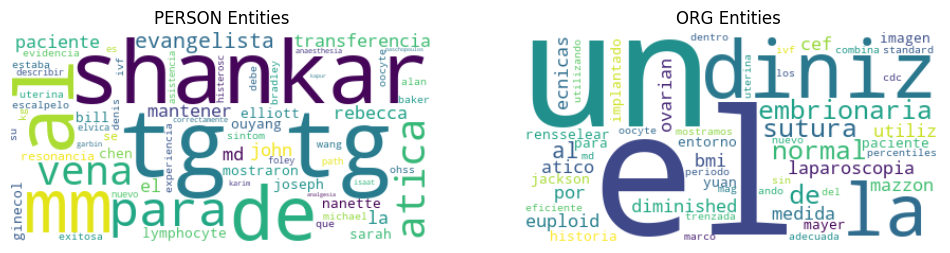

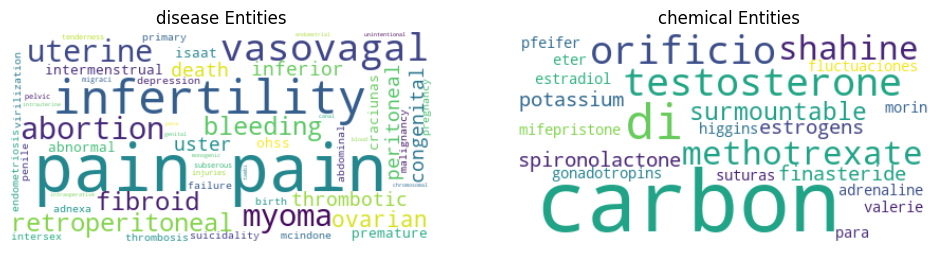

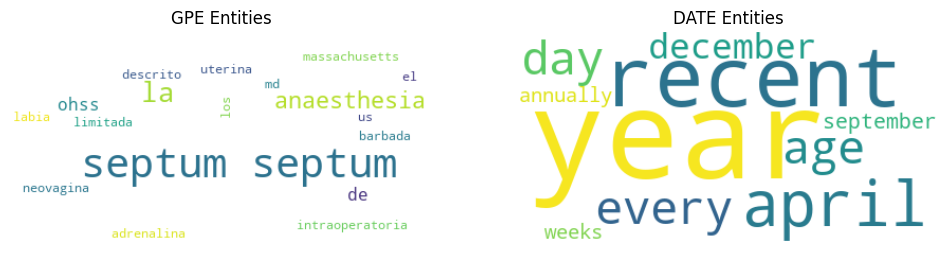

In [46]:
# Visualization of Named Entities
from wordcloud import WordCloud

# Generate word clouds
disease_wc = WordCloud(background_color='white').generate(' '.join(disease_entities['Token']))
chemical_wc = WordCloud(background_color='white').generate(' '.join(chemical_entities['Token']))
person_wc = WordCloud(background_color='white').generate(' '.join(person_entities['Token']))
org_wc = WordCloud(background_color='white').generate(' '.join(org_entities['Token']))
GPE_wc = WordCloud(background_color='white').generate(' '.join(GPE_entities['Token']))
DATE_wc = WordCloud(background_color='white').generate(' '.join(DATE_entities['Token']))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(person_wc, interpolation='bilinear')
plt.axis('off')
plt.title('PERSON Entities')

plt.subplot(1, 2, 2)
plt.imshow(org_wc, interpolation='bilinear')
plt.axis('off')
plt.title('ORG Entities')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(disease_wc, interpolation='bilinear')
plt.axis('off')
plt.title('disease Entities')

plt.subplot(1, 2, 2)
plt.imshow(chemical_wc, interpolation='bilinear')
plt.axis('off')
plt.title('chemical Entities')
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(GPE_wc, interpolation='bilinear')
plt.axis('off')
plt.title('GPE Entities')

plt.subplot(1, 2, 2)
plt.imshow(DATE_wc, interpolation='bilinear')
plt.axis('off')
plt.title('DATE Entities')


plt.show()

In [48]:
# save my dataset for fine tuning 
data.to_csv('my_dataset.csv')